<a href="https://colab.research.google.com/github/hadilhorchani/Clustering-/blob/main/Clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pandas

In [ ]:

import pandas as pd

In [ ]:


data = pd.DataFrame({"text": ['As his last major rival drops out, Trumps becomes the presumptive Republican nominee, setting up a November showdown with Biden']})

In [ ]:

data['text'] = data['text']

In [ ]:
 # Optional preprocessing steps
# Remove unnecessary characters
data['text'] = data['text'].str.replace('\n', ' ')
# Other preprocessing steps as needed

In [ ]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Get French stopwords
french_stopwords = stopwords.words('french')

# Create an instance of TfidfVectorizer with valid parameters
vectorizer = TfidfVectorizer(max_df=2, min_df=0.95, stop_words=french_stopwords)

# Create the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(data['text'])

# Print the list of terms included in the TF-IDF matrix
print(vectorizer.get_feature_names_out())

# Print the shape of the matrix
print(tfidf_matrix.shape)

['becomes' 'biden' 'drops' 'his' 'last' 'major' 'nominee' 'november' 'out'
 'presumptive' 'republican' 'rival' 'setting' 'showdown' 'the' 'trumps'
 'up' 'with']
(1, 18)


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=1, init='k-means++')

In [ ]:
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=1)

In [ ]:

import numpy as np

In [ ]:

# Display the number of elements in each cluster
cluster_counts = pd.Series(kmeans.labels_).value_counts().sort_index()
print("Number of elements in each cluster:")
print(cluster_counts)

# Display the content of the clusters
for cluster_id in range(kmeans.n_clusters):
    cluster_indices = np.where(kmeans.labels_ == cluster_id)[0]
    print(f"\nCluster {cluster_id}:")
    for idx in cluster_indices:
        print(data.iloc[idx]['text'])

Number of elements in each cluster:
0    1
Name: count, dtype: int64

Cluster 0:
As his last major rival drops out, Trumps becomes the presumptive Republican nominee, setting up a November showdown with Biden


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


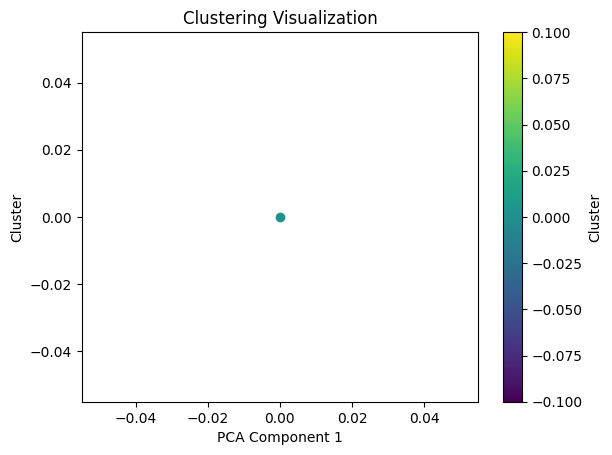

In [ ]:

# Reduce dimensionality using PCA with 1 component
pca = PCA(n_components=1)
tfidf_matrix_1d = pca.fit_transform(tfidf_matrix.toarray())

# Plot clusters
plt.scatter(tfidf_matrix_1d[:, 0], np.zeros_like(tfidf_matrix_1d[:, 0]), c=kmeans.labels_, cmap='viridis')
plt.title('Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('Cluster')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Display the content of the clusters
for cluster_id in range(kmeans.n_clusters):
    cluster_indices = np.where(kmeans.labels_ == cluster_id)[0]
    print(f"\nCluster {cluster_id}:")
    for idx in cluster_indices:
        print(data.iloc[idx]['text'])


Cluster 0:
As his last major rival drops out, Trumps becomes the presumptive Republican nominee, setting up a November showdown with Biden


In [ ]:

from sklearn.metrics import silhouette_score

In [ ]:
# Fit the KMeans model to the TF-IDF matrix
kmeans.fit(tfidf_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=1, random_state=42)

In [ ]:
# Calculate the inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 0.0
